In [1]:
import os
import pandas as pd
import numpy as np

import pylab as plt
import statistics
import scipy.stats

In [7]:
wkdir= "/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/"


In [10]:
data_year = "2020"
cell_name = "BC3C"

data_dir = os.path.join(wkdir,"00_outputs_" + data_year + "_" + cell_name)

## Data_norm

In [14]:
data_file = os.path.join(data_dir, "Data_norm_" + data_year + "_" + cell_name+ ".xlsx")
Data_norm = pd.read_excel(data_file, index_col = 0)
display(Data_norm)

genes_list = Data_norm.columns.to_list()
print("Landmark genes in LINCS data:", len(genes_list), genes_list)

exp_id_list = Data_norm.index.to_list()
print("Experiments in LINCS data for " + cell_name + " cells:", len(exp_id_list), exp_id_list)

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_BC3C_24H:A03,-0.191254,-0.055246,0.039596,-0.256266,-0.040419,-0.590523,-0.159396,-0.074319,0.457981,0.409608,...,0.543203,0.494266,-0.011923,-0.225931,0.285054,-0.775246,0.166031,-0.024873,0.238723,0.284204
ASG002_BC3C_24H:A04,-0.265754,-0.317496,0.118696,-0.136665,-0.301569,-0.403023,0.124804,-0.036470,0.311931,0.660457,...,-0.565096,-0.088634,0.122977,-0.047931,0.141804,0.129054,-0.028819,-0.028773,-0.253627,-0.752646
ASG002_BC3C_24H:A05,-0.181954,-0.081597,-0.210304,1.559535,-0.019019,-0.457423,0.071404,0.074080,-0.356119,0.498808,...,0.226104,-0.228034,-0.121023,-0.075331,-0.133146,0.355054,0.022831,-0.084073,0.283123,-0.894896
ASG002_BC3C_24H:A06,0.033446,0.042404,-0.150154,-0.093165,0.053180,-0.053823,0.087704,0.167681,-0.601569,0.383308,...,-0.608596,-0.228835,0.072777,0.082970,-0.570996,2.847754,-0.211670,-0.067273,0.081723,0.338704
ASG002_BC3C_24H:J13,0.204446,0.180704,0.089096,-0.054666,0.053381,0.044877,-0.277396,-0.157419,0.535681,-3.933493,...,-0.318397,0.122265,-0.134323,-0.088931,-0.067996,-0.515847,-0.005069,0.067527,0.002223,0.204904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,0.647151,0.211700,-0.979200,0.597350,-0.375751,0.388300,0.394524,0.120151,-0.166775,-1.129125,...,-1.598475,-0.552750,0.515151,0.120800,0.082675,0.529700,0.383225,-0.207225,2.268450,-1.248500
MOAR012_BC3C_24H:P21,0.171800,0.046300,-0.145550,-0.295150,0.030849,0.420951,0.222075,0.179800,0.274724,-0.423975,...,-1.650575,0.203600,-0.003250,-0.064800,-0.037675,0.076499,0.201825,0.416875,0.287450,-0.971700
MOAR012_BC3C_24H:P22,0.648700,0.058749,-0.031700,0.408249,-0.753950,0.332200,-0.357525,-0.107650,-0.213575,0.074225,...,0.127625,0.031600,0.103250,-0.249600,0.046375,1.486200,0.440325,0.090075,-0.031650,-0.944300
MOAR012_BC3C_24H:P23,0.090499,-0.469300,-0.611800,0.873550,-0.788450,-0.097199,-0.366575,-0.490600,-0.624675,-0.009275,...,0.054676,-0.596050,0.084600,0.444700,0.431375,-0.921501,0.044926,0.716076,-0.000900,-1.106700


Landmark genes in LINCS data: 978 ['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3', 'ABHD4', 'ABHD6', 'ABL1', 'ACAA1', 'ACAT2', 'ACBD3', 'ACD', 'ACLY', 'ACOT9', 'ADAM10', 'ADAT1', 'ADGRE5', 'ADGRG1', 'ADH5', 'ADI1', 'ADO', 'ADRB2', 'AGL', 'AKAP8', 'AKAP8L', 'AKR7A2', 'AKT1', 'ALAS1', 'ALDH7A1', 'ALDOA', 'ALDOC', 'AMDHD2', 'ANKRD10', 'ANO10', 'ANXA7', 'APBB2', 'APOE', 'APP', 'APPBP2', 'ARFIP2', 'ARHGAP1', 'ARHGEF12', 'ARHGEF2', 'ARID4B', 'ARID5B', 'ARL4C', 'ARNT2', 'ARPP19', 'ASAH1', 'ASCC3', 'ATF1', 'ATF5', 'ATF6', 'ATG3', 'ATMIN', 'ATP11B', 'ATP1B1', 'ATP2C1', 'ATP6V0B', 'ATP6V1D', 'AURKA', 'AURKB', 'AXIN1', 'B4GAT1', 'BACE2', 'BAD', 'BAG3', 'BAMBI', 'BAX', 'BCL2', 'BCL7B', 'BDH1', 'BECN1', 'BHLHE40', 'BID', 'BIRC2', 'BIRC5', 'BLCAP', 'BLMH', 'BLVRA', 'BMP4', 'BNIP3', 'BNIP3L', 'BPHL', 'BRCA1', 'BTK', 'BUB1B', 'BZW2', 'C2CD2', 'C2CD2L', 'C2CD5', 'C5', 'CAB39', 'CALM3', 'CALU', 'CAMSAP2', 'CANT1', 'CAPN1', 'CARMIL1', 'CASC3', 'CASK', 'CASP10', 'CASP2', 'CASP3', 'CASP7', 'CAST', 'CAT', 'CBLB

## Sig_info

In [15]:
data_file = os.path.join(data_dir, "sig_info_" + data_year + "_" + cell_name+ ".xlsx")
sig_info_cell_df = pd.read_excel(data_file, index_col = 0).fillna("")
display(sig_info_cell_df)

,cell,plate,time,level_3_samples,samples_number,pert_type,pert_drug,targets,targets_number,dose,dose_float
level_5_sig_id,,,,,,,,,,,
ASG002_BC3C_24H:A03,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:A03,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_BC3C_24H:A04,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:A04,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_BC3C_24H:A05,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:A05,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_BC3C_24H:A06,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:A06,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_BC3C_24H:J13,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:J13,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,BC3C,MOAR012,24 h,MOAR012_BC3C_24H_X1_B36:P20,1,trt_cp,BAY-61-3606,,0,3.33 uM,3.33
MOAR012_BC3C_24H:P21,BC3C,MOAR012,24 h,MOAR012_BC3C_24H_X1_B36:P21,1,trt_cp,BAY-61-3606,,0,1.11 uM,1.11
MOAR012_BC3C_24H:P22,BC3C,MOAR012,24 h,MOAR012_BC3C_24H_X1_B36:P22,1,trt_cp,ethaverine,,0,10 uM,10.00


In [16]:
sig_info_cell_df['pert_drug'].unique()

array(['DMSO', 'CGS-15943', 'taselisib', 'TW-37', 'lorazepam',
       'AS-605240', 'calcipotriol', 'XL-888', 'ABT-751', 'AMG-232',
       'RITA', 'indinavir', 'cabozantinib', 'nocodazole', 'nelfinavir',
       'AG-14361', 'PJ-34', 'procaterol', 'nutlin-3', 'NVP-BEZ235',
       'MG-132', 'NVP-AUY922', 'birinapant', 'gatifloxacin',
       'panobinostat', 'R-547', 'oncrasin-1', 'rucaparib', 'imatinib',
       'BRD-K76674262', 'zolpidem', 'anagrelide', 'levosulpiride',
       'obatoclax', 'masitinib', 'roscovitine', 'LY-294002', 'alvocidib',
       'lomerizine', 'floxuridine', 'sorafenib', 'gefitinib', 'alectinib',
       'trifluoperazine', 'epirubicin', 'axitinib', 'trametinib',
       'tamibarotene', 'vorinostat', 'tandutinib', 'chelidonine',
       'entinostat', 'BI-2536', 'olaparib', 'camptothecin', 'digoxin',
       'fostamatinib', 'erlotinib', 'ABT-737', 'YM-155', 'equilin',
       'daunorubicin', 'dasatinib', 'orciprenaline', 'lapatinib',
       'AM-580', 'ponatinib', 'CGS-21680', '

## Input_info - ALL_DATA (modules, STV)

In [8]:
#data_file = "ALL_DATA_" + data_year + "_" + task + ".xlsx"
modules = pd.read_excel("/Users/lidiayung/project/resource/perturbations/ALL_DATA_2020_Jing.xlsx", sheet_name = "modules", index_col = 0)
display(modules)

""
Module
CDK1
CDK2
CDK4
CDK6
NFkB
PI3K
TGFbR
VEGFR
PKC


## STV (State Transition Vectors)

In [17]:
#data_file = "ALL_DATA_" + data_year + "_" + task + ".xlsx" 
STVs = pd.read_excel('/home/jing/Phd_project/project_UCD_blca/blca_publication/blca_publication_Scripts/ALL_DATA_2020_Jing.xlsx', sheet_name = "STV", index_col = 0)
display(STVs)

states = STVs.columns.to_list()
print("States:", states)

,blca_invasiveness,blca_oncogenesis,blca_survival
Genes,,,
AARS,0.016052,0.078487,0.000000
ABCB6,0.001612,0.027125,-2.744978
ABCC5,-0.016742,0.002121,0.000000
ABCF1,-0.038990,-0.028959,-0.555168
ABCF3,0.023288,0.036671,0.000000
...,...,...,...
ZNF395,0.000000,0.000000,0.000000
ZNF451,0.011450,0.013403,0.000000
ZNF586,0.000000,0.000000,0.000000


States: ['blca_invasiveness', 'blca_oncogenesis', 'blca_survival']


In [18]:
STV_df = pd.DataFrame(
    np.zeros((len(genes_list), len(states))), 
    index = genes_list, 
    columns = states)

STV_df.loc[STVs.index] = STVs

display(STV_df)

,blca_invasiveness,blca_oncogenesis,blca_survival
AARS,0.016052,0.078487,0.000000
ABCB6,0.001612,0.027125,-2.744978
ABCC5,-0.016742,0.002121,0.000000
ABCF1,-0.038990,-0.028959,-0.555168
ABCF3,0.023288,0.036671,0.000000
...,...,...,...
ZNF395,0.000000,0.000000,0.000000
ZNF451,0.011450,0.013403,0.000000
ZNF586,0.000000,0.000000,0.000000
ZNF589,0.000000,0.000000,0.000000


## DPD calculating

In [19]:
DPD_df = pd.DataFrame(
    np.zeros((len(exp_id_list), len(states))),
    index = exp_id_list,
    columns = states,
)

In [20]:
DPD_df

,blca_invasiveness,blca_oncogenesis,blca_survival
ASG002_BC3C_24H:A03,0.0,0.0,0.0
ASG002_BC3C_24H:A04,0.0,0.0,0.0
ASG002_BC3C_24H:A05,0.0,0.0,0.0
ASG002_BC3C_24H:A06,0.0,0.0,0.0
ASG002_BC3C_24H:J13,0.0,0.0,0.0
...,...,...,...
MOAR012_BC3C_24H:P20,0.0,0.0,0.0
MOAR012_BC3C_24H:P21,0.0,0.0,0.0
MOAR012_BC3C_24H:P22,0.0,0.0,0.0
MOAR012_BC3C_24H:P23,0.0,0.0,0.0


In [36]:
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id] = np.dot(Data_norm.loc[exp_id], STV_df.loc[:, ])

display(DPD_df)

,blca_invasiveness,blca_oncogenesis,blca_survival
ASG002_BC3C_24H:A03,0.224169,0.302763,-2.305911
ASG002_BC3C_24H:A04,0.150151,-0.135368,-3.117183
ASG002_BC3C_24H:A05,0.167952,-0.014359,-2.260927
ASG002_BC3C_24H:A06,0.328579,-0.094210,-6.709615
ASG002_BC3C_24H:J13,-0.582389,-0.243571,0.612093
...,...,...,...
MOAR012_BC3C_24H:P20,1.639600,-0.777955,3.452730
MOAR012_BC3C_24H:P21,0.843686,-0.200156,0.625054
MOAR012_BC3C_24H:P22,0.530906,0.472079,-1.294036
MOAR012_BC3C_24H:P23,0.684520,-0.052636,-7.776345


In [37]:
DPD_inf_df = pd.concat([
                            DPD_df,
                            sig_info_cell_df.loc[DPD_df.index, ["pert_drug", "targets", "dose"]]
                            ], axis = 1)

display(DPD_inf_df)

,blca_invasiveness,blca_oncogenesis,blca_survival,pert_drug,targets,dose
ASG002_BC3C_24H:A03,0.224169,0.302763,-2.305911,DMSO,DMSO_No_target,0 uM
ASG002_BC3C_24H:A04,0.150151,-0.135368,-3.117183,DMSO,DMSO_No_target,0 uM
ASG002_BC3C_24H:A05,0.167952,-0.014359,-2.260927,DMSO,DMSO_No_target,0 uM
ASG002_BC3C_24H:A06,0.328579,-0.094210,-6.709615,DMSO,DMSO_No_target,0 uM
ASG002_BC3C_24H:J13,-0.582389,-0.243571,0.612093,DMSO,DMSO_No_target,0 uM
...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,1.639600,-0.777955,3.452730,BAY-61-3606,,3.33 uM
MOAR012_BC3C_24H:P21,0.843686,-0.200156,0.625054,BAY-61-3606,,1.11 uM
MOAR012_BC3C_24H:P22,0.530906,0.472079,-1.294036,ethaverine,,10 uM
MOAR012_BC3C_24H:P23,0.684520,-0.052636,-7.776345,ethaverine,,3.33 uM


In [22]:
#DPD_inf_df.to_excel(os.path.join(out_dir, "DPD_" + data_year + "_" + cell_name + "_" + task + ".xlsx"))
#DPD_inf_df.to_csv(os.path.join(out_dir, "DPD_" + data_year + "_" + cell_name + "_" + task + ".csv"))

In [19]:
#print(os.path.join(out_dir, "DPD_" + data_year + "_" + cell_name + "_" + task + ".xlsx"))

00_plots_2020_BC3C_/DPD_2020_BC3C_Jing.xlsx


## Analisys of DPD values to find targets

In [38]:
i = 0
top = 10

DPD_analysis = pd.concat([
                            DPD_inf_df.sort_values(by = states[i])[:top],
                            DPD_inf_df.sort_values(by = states[i])[len(DPD_df.index) - top:]
                            ], axis = 0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))

,blca_invasiveness,blca_oncogenesis,blca_survival,pert_drug,targets,dose
ASG002_BC3C_24H:P01,-2.700581,0.536365,-11.435153,emetine,RPS2,10 uM
ASG002_BC3C_24H:E01,-2.428984,1.114432,-2.411669,BRD-K76674262,,10 uM
ASG002_BC3C_24H:K20,-2.030302,1.774052,-3.681284,anguidine,SLC5A1,1.11 uM
MOAR008_BC3C_24H:I02,-1.738327,0.187365,-13.653876,ATPA,GRIK1,3.33 uM
MOAR008_BC3C_24H:C06,-1.680711,-0.002551,-5.005870,L-701252,GRIN1,1.11 uM
ASG002_BC3C_24H:H10,-1.609711,-0.423397,0.119926,digoxin,ATP1A1,10 uM
MOAR010_BC3C_24H:H17,-1.434855,0.483954,-3.663649,zibotentan,EDNRA,3.33 uM
MOAR008_BC3C_24H:K19,-1.412269,0.913240,-14.251200,clinofibrate,LPL,10 uM
ASG002_BC3C_24H:P02,-1.385964,-0.054773,0.213919,emetine,RPS2,1.11 uM
MOAR008_BC3C_24H:B08,-1.330887,-0.000166,-5.775339,physostigmine,ACHE,3.33 uM


Targets: 14 ['', 'ACHE', 'ACHE, BCHE', 'ATP1A1', 'ATP2B1, PDE1A', 'BCL2', 'EDNRA', 'GRIK1', 'GRIN1', 'LPL', 'PSMB1', 'RPS2', 'SIRT1, SIRT2, SIRT3', 'SLC5A1']


In [28]:
i = 1
top = 10

# Assuming states is a list of column names in DPD_inf_df
state_column = states

# Sorting the DataFrame based on the values in the specified state column
sorted_DPD_inf_df = DPD_inf_df.sort_values(by=state_column)

# Selecting the top and bottom rows based on the sorted values in the state column
top_rows = sorted_DPD_inf_df[:top]
bottom_rows = sorted_DPD_inf_df[len(DPD_inf_df.index) - top:]

# Concatenating the selected rows into a new DataFrame
DPD_analysis = pd.concat([top_rows, bottom_rows], axis=0)

# Displaying the concatenated DataFrame
display(DPD_analysis)

# Printing the number of unique targets and their sorted list
print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))


,blca_invasiveness,blca_oncogenesis,blca_survival,pert_drug,targets,dose
ASG002_BC3C_24H:P01,-2.700581,0.536365,-11.435153,emetine,RPS2,10 uM
ASG002_BC3C_24H:E01,-2.428984,1.114432,-2.411669,BRD-K76674262,,10 uM
ASG002_BC3C_24H:K20,-2.030302,1.774052,-3.681284,anguidine,SLC5A1,1.11 uM
MOAR008_BC3C_24H:I02,-1.738327,0.187365,-13.653876,ATPA,GRIK1,3.33 uM
MOAR008_BC3C_24H:C06,-1.680711,-0.002551,-5.005870,L-701252,GRIN1,1.11 uM
ASG002_BC3C_24H:H10,-1.609711,-0.423397,0.119926,digoxin,ATP1A1,10 uM
MOAR010_BC3C_24H:H17,-1.434855,0.483954,-3.663649,zibotentan,EDNRA,3.33 uM
MOAR008_BC3C_24H:K19,-1.412269,0.913240,-14.251200,clinofibrate,LPL,10 uM
ASG002_BC3C_24H:P02,-1.385964,-0.054773,0.213919,emetine,RPS2,1.11 uM
MOAR008_BC3C_24H:B08,-1.330887,-0.000166,-5.775339,physostigmine,ACHE,3.33 uM


Targets: 14 ['', 'ACHE', 'ACHE, BCHE', 'ATP1A1', 'ATP2B1, PDE1A', 'BCL2', 'EDNRA', 'GRIK1', 'GRIN1', 'LPL', 'PSMB1', 'RPS2', 'SIRT1, SIRT2, SIRT3', 'SLC5A1']


In [29]:
i = 1
top = 10

DPD_analysis = pd.concat([
                            DPD_inf_df.sort_values(by = states)[:top],
                            DPD_inf_df.sort_values(by = states)[len(DPD_df.index) - top:]
                            ], axis = 0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))

,blca_invasiveness,blca_oncogenesis,blca_survival,pert_drug,targets,dose
ASG002_BC3C_24H:P01,-2.700581,0.536365,-11.435153,emetine,RPS2,10 uM
ASG002_BC3C_24H:E01,-2.428984,1.114432,-2.411669,BRD-K76674262,,10 uM
ASG002_BC3C_24H:K20,-2.030302,1.774052,-3.681284,anguidine,SLC5A1,1.11 uM
MOAR008_BC3C_24H:I02,-1.738327,0.187365,-13.653876,ATPA,GRIK1,3.33 uM
MOAR008_BC3C_24H:C06,-1.680711,-0.002551,-5.005870,L-701252,GRIN1,1.11 uM
ASG002_BC3C_24H:H10,-1.609711,-0.423397,0.119926,digoxin,ATP1A1,10 uM
MOAR010_BC3C_24H:H17,-1.434855,0.483954,-3.663649,zibotentan,EDNRA,3.33 uM
MOAR008_BC3C_24H:K19,-1.412269,0.913240,-14.251200,clinofibrate,LPL,10 uM
ASG002_BC3C_24H:P02,-1.385964,-0.054773,0.213919,emetine,RPS2,1.11 uM
MOAR008_BC3C_24H:B08,-1.330887,-0.000166,-5.775339,physostigmine,ACHE,3.33 uM


Targets: 14 ['', 'ACHE', 'ACHE, BCHE', 'ATP1A1', 'ATP2B1, PDE1A', 'BCL2', 'EDNRA', 'GRIK1', 'GRIN1', 'LPL', 'PSMB1', 'RPS2', 'SIRT1, SIRT2, SIRT3', 'SLC5A1']


## Plots for targets

In [17]:
print_drugs = []

### CDK1/2

In [39]:
target_name = "CDK1_CDK2"

target = "CDK1"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "CDK2"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

drugs for target CDK1_CDK2: 4 ['JNJ-7706621', 'PHA-793887', 'alvocidib', 'roscovitine']


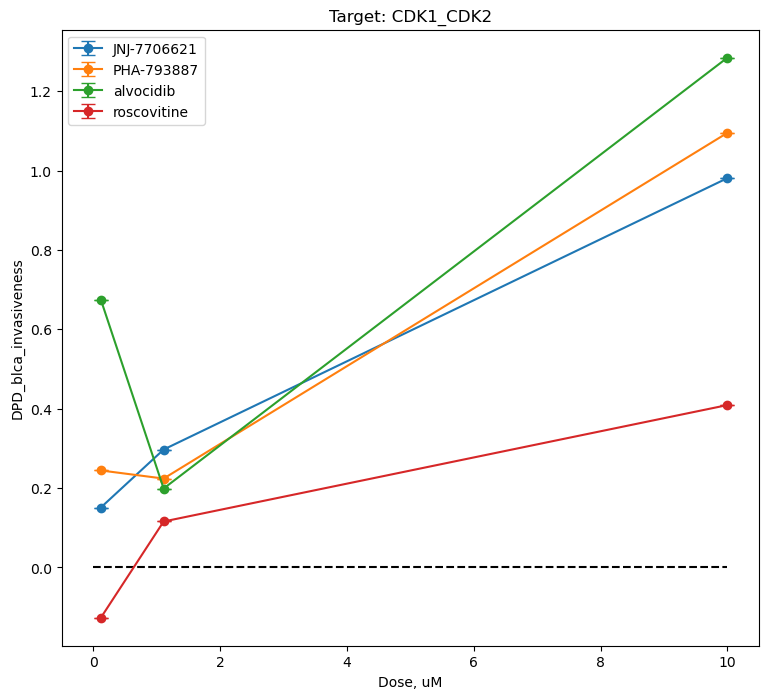

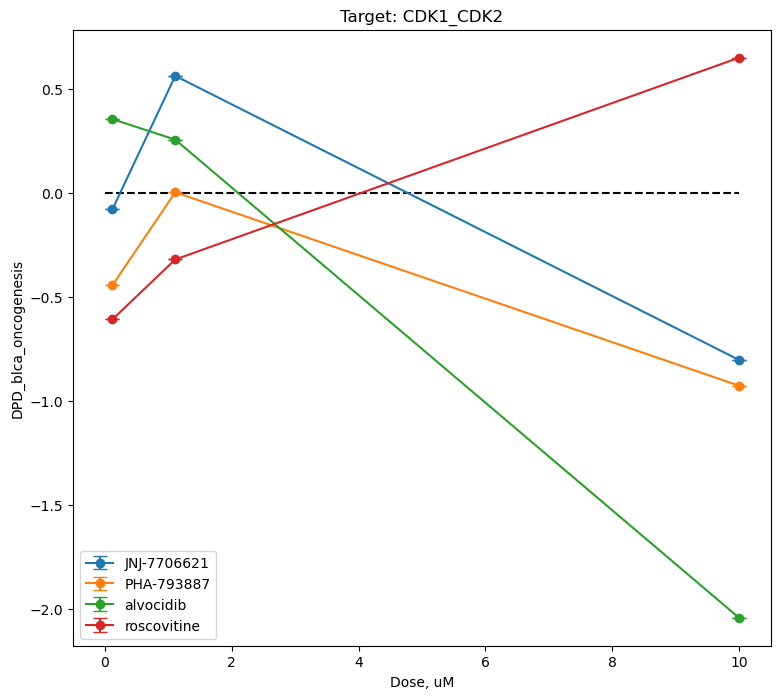

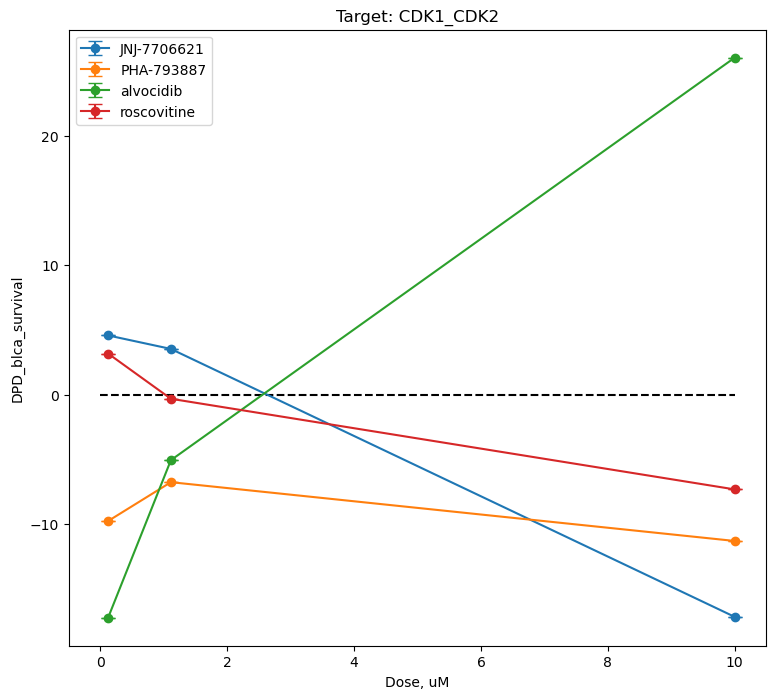

In [40]:
target_name = "CDK1_CDK2"
target_drugs = drugs

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [21]:
# delete OTS-167
print_drugs += ["CGP-60474", "dinaciclib", "PHA-767491", "roscovitine"]

In [22]:
# delete for roscovitine dose 3,33 uM
labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == "roscovitine") & (sig_info_cell_df.dose_float == 3.33)].index.to_list()
print(labels)

['REP.A011_HUVEC.A_24H:O08']


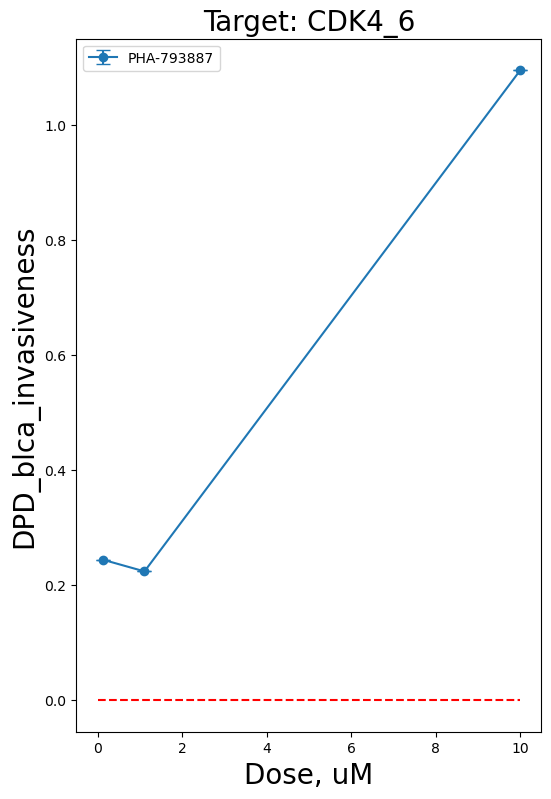

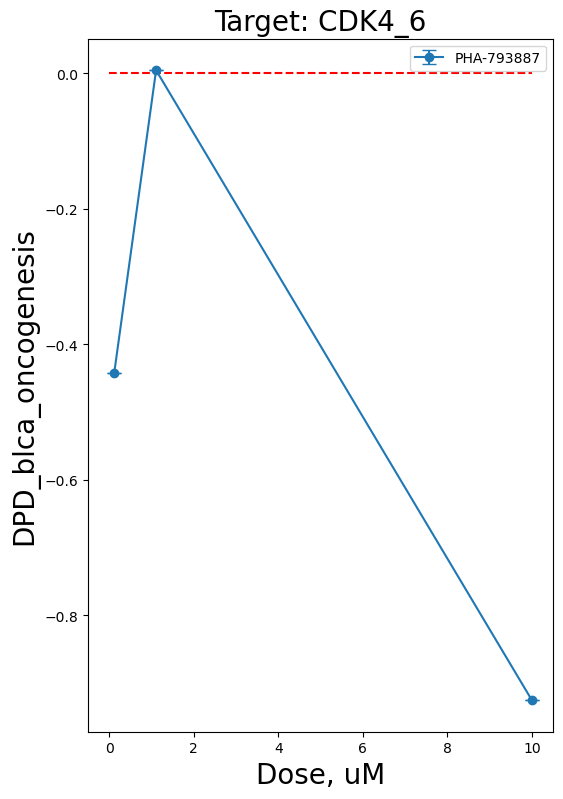

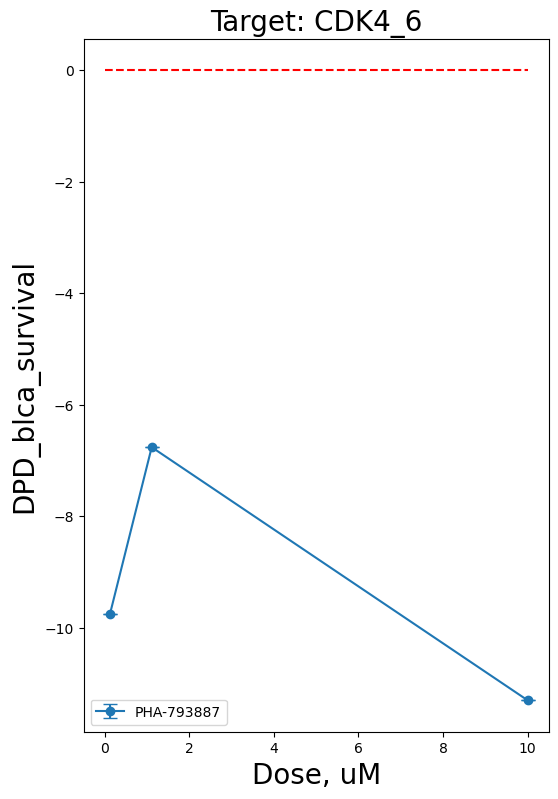

In [53]:
target_name = "CDK4_6"
target_drugs=['PHA-793887']
#target_drugs = ["CGP-60474", "dinaciclib", "roscovitine", "OTS-167", "PHA-767491"]
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### PI3K

In [59]:
target = "PIK3"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PIK3: 6 ['AS-605240', 'GDC-0349', 'LY-294002', 'NVP-BEZ235', 'PI-103', 'taselisib']


In [60]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AS-605240,PIK3CG,"0.12 uM, 1.11 uM, 10 uM"
GDC-0349,PIK3CA,"1.11 uM, 10 uM, 3.33 uM"
LY-294002,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG, PLK1, PRKDC","0.12 uM, 1.11 uM, 10 uM"
NVP-BEZ235,"MTOR, PIK3CA, PIK3CD, PIK3CG","0.12 uM, 1.11 uM, 10 uM"
PI-103,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG","0.12 uM, 1.11 uM, 10 uM"
taselisib,PIK3CA,"1.11 uM, 10 uM"


ValueError: 'x' and 'y' must have the same size

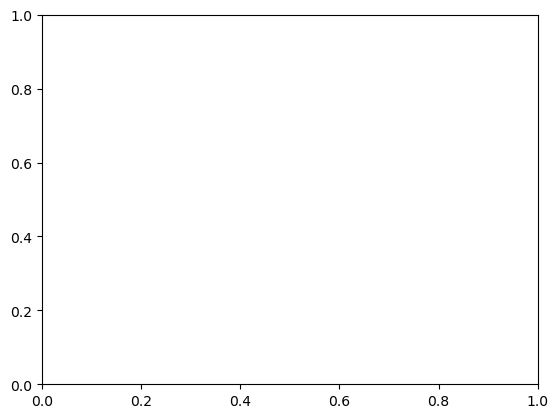

In [61]:
target_name = "PI3K"
target_drugs = drugs_list
# deleted idelalisib, quercetin because other targets = PIK3CD, PIK3CG (delta, gamma, we use only alpha)



for drug in target_drugs:
    doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
    DPDs = []
    DPD_errs = []
    for dose in doses:
        labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
        DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
        if (len(labels) > 1):
            DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
        else:
            DPD_errs.append(0)
            plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
plt.legend()
plt.plot([0,10], [0,0], "--", color = "black")
plt.xlabel("Dose, uM")
plt.ylabel("DPD_" + DPD_val)
plt.title("Target: " + target_name)
#plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
plt.show()

### ERK

In [ ]:
target_name = "ERK"

target = "MAP2K"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "MAPK"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "RAF"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

In [ ]:
drugs_list = drugs + ["RAF-265"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

In [ ]:
target_name = "ERK"
target_drugs = ["AZ-628", "FR-180204", "GDC-0879", "GW-5074", "PD-0325901", "PD-184352", "TAK-733", "dabrafenib", "refametinib", "RAF-265"]
# deleted SB-203580 (MAPK1)
# select only gene name RAF1, BRAF, MAP2K1, MAP2K2, MAPK1, MAPK3   (Kinase pathway RAF->MEK->ERK) = module "ERK2

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [ ]:
print_drugs += target_drugs

### BET

In [ ]:
target = "BRD4"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

In [ ]:
drugs_list = drugs + ["I-BET-151", "JQ-1-R", "PFI-1"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

In [ ]:
target_name = "BET"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [ ]:
print_drugs += target_drugs

### Aurora

In [ ]:
target = "AURK"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

In [ ]:
drugs_list = drugs + ["aurora-a-inhibitor-i"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

In [ ]:
target_name = "Aurora"
target_drugs = ["GSK-1070916", "MLN-8054", "ZM-447439", "alisertib", "JWE-035"]
# deleted ENMD-2076, KW-2449, orantinib because other targets 
# deleted aurora-a-inhibitor-i (2017) - not in data 2020

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [ ]:
# delete JWE-035 bacause no enought info
print_drugs += ["GSK-1070916", "MLN-8054", "ZM-447439", "alisertib"]

### TGFbR

In [364]:
target = "EGFR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target EGFR: 6 ['afatinib', 'alvocidib', 'erlotinib', 'gefitinib', 'lapatinib', 'vandetanib']


In [330]:
sig_info_cell_df[sig_info_cell_df['pert_drug']=='bortezomib']

,cell,plate,time,level_3_samples,samples_number,pert_type,pert_drug,targets,targets_number,dose,dose_float
level_5_sig_id,,,,,,,,,,,
ASG002_BC3C_24H:K07,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:K07,1,trt_cp,bortezomib,"PSMB1, PSMB2, PSMB5",3,20 uM,20.0
ASG002_BC3C_24H:K09,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:K09,1,trt_cp,bortezomib,"PSMB1, PSMB2, PSMB5",3,20 uM,20.0
ASG002_BC3C_24H:K10,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:K10,1,trt_cp,bortezomib,"PSMB1, PSMB2, PSMB5",3,20 uM,20.0
ASG002_BC3C_24H:K11,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:K11,1,trt_cp,bortezomib,"PSMB1, PSMB2, PSMB5",3,20 uM,20.0
ASG002_BC3C_24H:K12,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:K12,1,trt_cp,bortezomib,"PSMB1, PSMB2, PSMB5",3,20 uM,20.0


In [365]:
drug = 'afatinib'  # Specify the drug you are interested in

# Filter the DataFrame to include only rows corresponding to the specified drug
drug_info = sig_info_cell_df[sig_info_cell_df.pert_drug == drug]

# Extract unique targets and doses for the specified drug
targets = ", ".join(sorted(list(set(drug_info.targets))))
doses = ", ".join(sorted(list(set(drug_info.dose))))

# Create a DataFrame with the extracted information
target_drugs_df = pd.DataFrame({"targets": 'TGFbR', "doses": [doses]}, index=[drug])

# Display the DataFrame
display(target_drugs_df)


,targets,doses
afatinib,TGFbR,"0.12 uM, 1.11 uM, 10 uM"


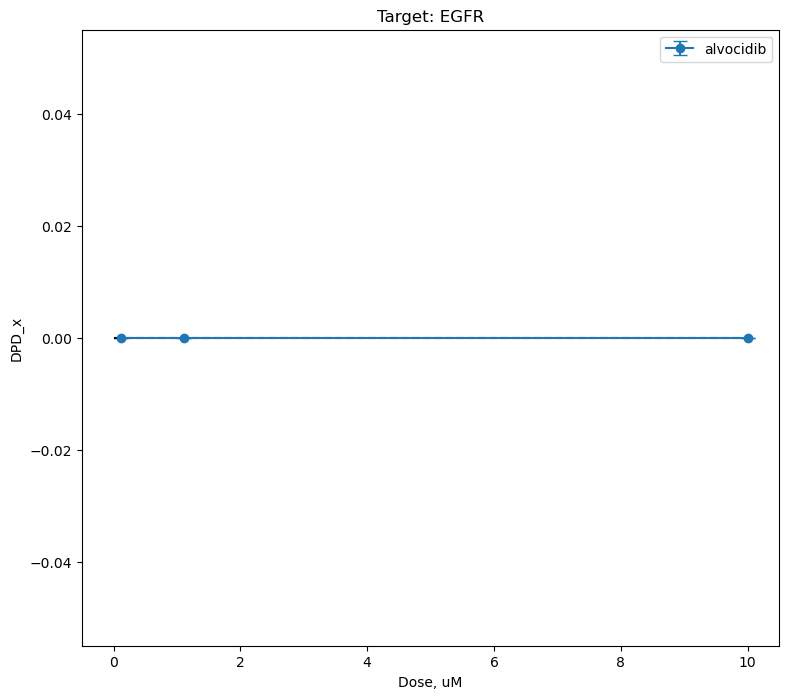

In [367]:
target_name = "EGFR"
target_drug = "alvocidib"  # Specify the drug you are interested in

plt.figure(figsize=(9, 8))
doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == target_drug].dose_float)))
for DPD_val in states:
    DPDs = []
    DPD_errs = []
    for dose in doses:
        labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == target_drug) & (sig_info_cell_df.dose_float == dose)].index
        DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
        if len(labels) > 1:
            DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
        else:
            DPD_errs.append(0)
    plt.errorbar(doses, DPDs, yerr=DPD_errs, fmt="o-", label=target_drug, capsize=5)

plt.legend()
plt.plot([0, 10], [0, 0], "--", color="black")
plt.xlabel("Dose, uM")
plt.ylabel("DPD_" + DPD_val)
plt.title("Target: " + target_name)
plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi=300)
plt.show()


In [47]:
print_drugs += target_drugs

### VEGFR

In [123]:
drugs_list = ["rebastinib", "lenvatinib", "orantinib", "foretinib", "cediranib", "sunitinib", "tivozanib"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
rebastinib,,
lenvatinib,,
orantinib,,
foretinib,,
cediranib,,
sunitinib,,
tivozanib,,


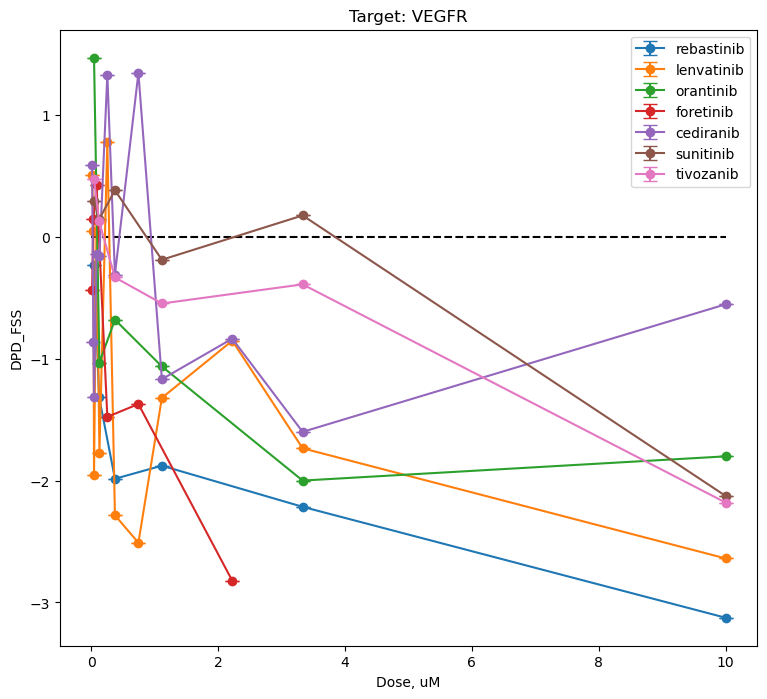

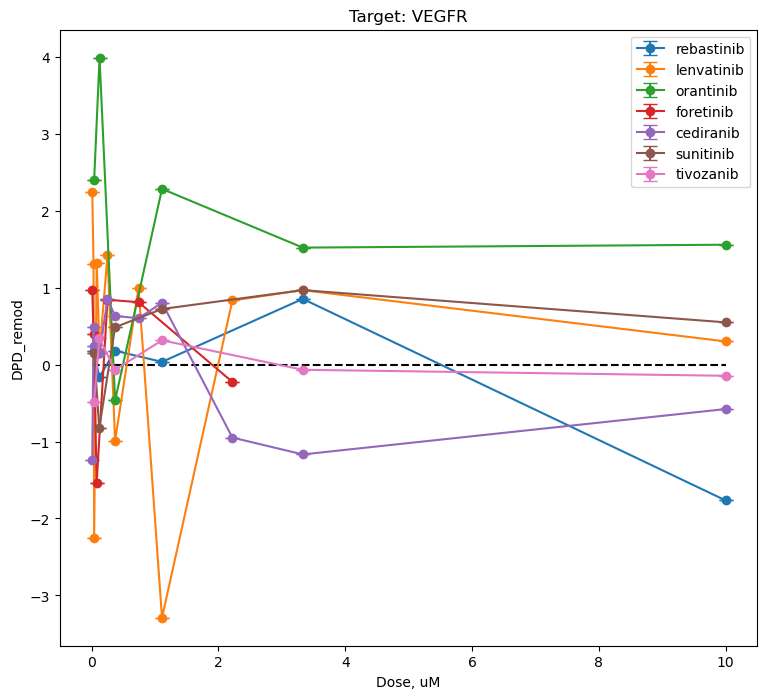

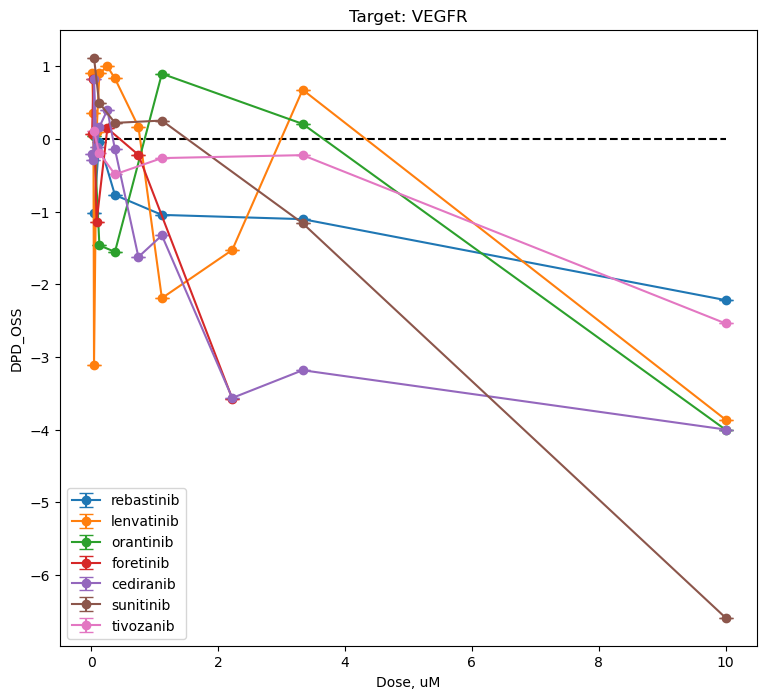

In [49]:
target_name = "VEGFR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [50]:
print_drugs += target_drugs

### PKC

In [124]:
target = "PRKC"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PRKC: 0 []


In [52]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
enzastaurin,PRKCB,"0.01 uM, 0.03 uM, 0.08 uM, 0.74 uM, 2.22 uM"


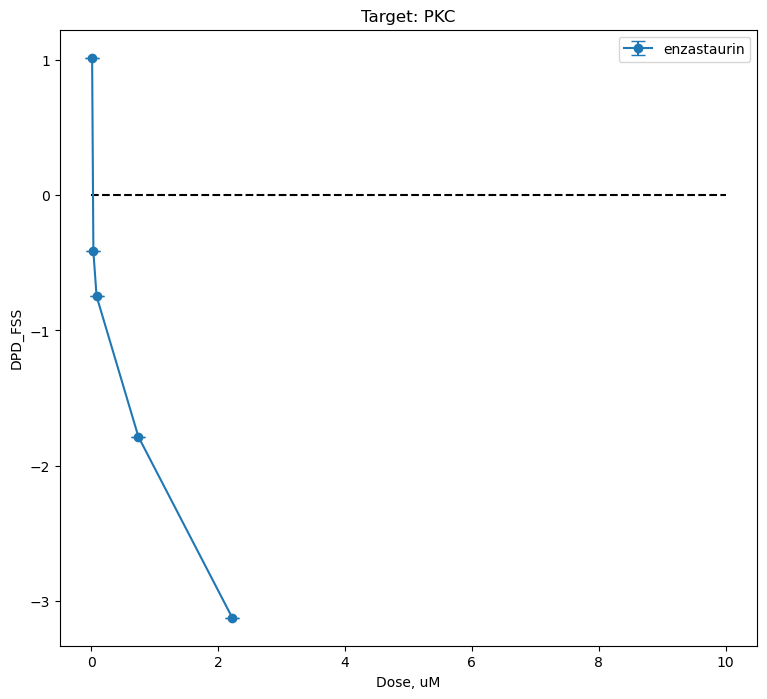

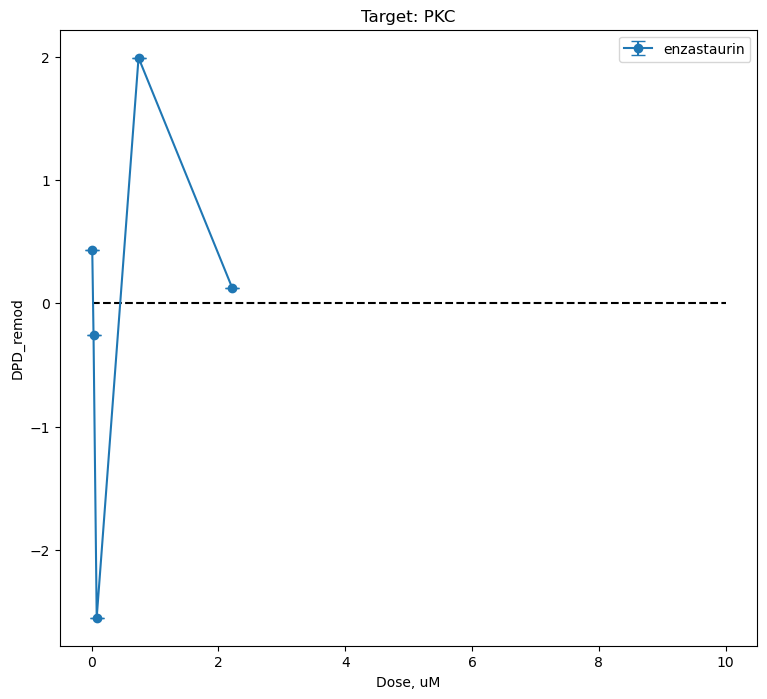

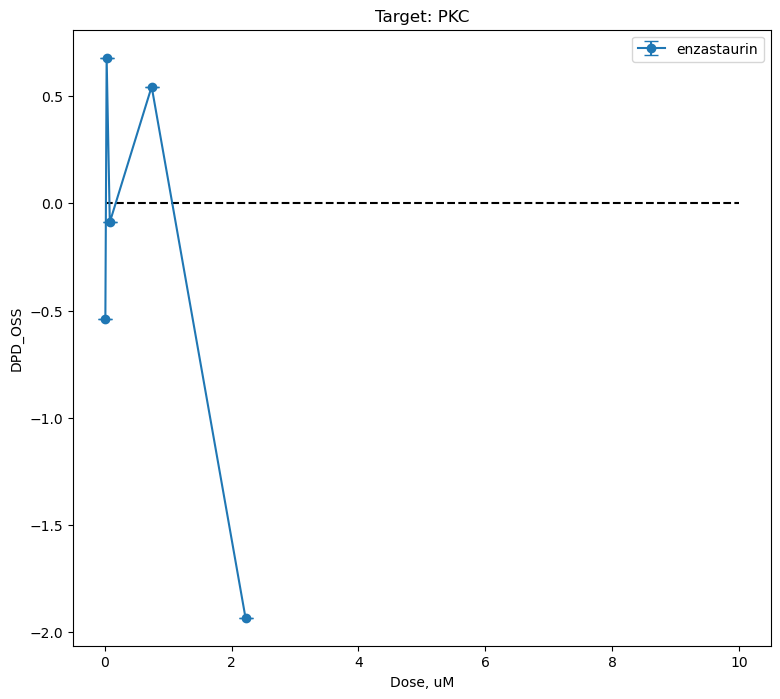

In [53]:
target_name = "PKC"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [54]:
print_drugs += target_drugs

### p53

In [333]:
target = "MDM2"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target MDM2: 6 ['AMG-232', 'HLI-373', 'RITA', 'SAR405838', 'nutlin-3', 'serdemetan']


In [334]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AMG-232,MDM2,"0.12 uM, 1.11 uM, 10 uM"
HLI-373,MDM2,"1.11 uM, 10 uM, 3.33 uM"
RITA,MDM2,"0.08 uM, 1.11 uM, 10 uM, 3.33 uM"
SAR405838,MDM2,"1.11 uM, 10 uM, 3.33 uM"
nutlin-3,MDM2,"0.12 uM, 1.11 uM, 10 uM, 3.33 uM"
serdemetan,MDM2,"1.11 uM, 10 uM, 3.33 uM"


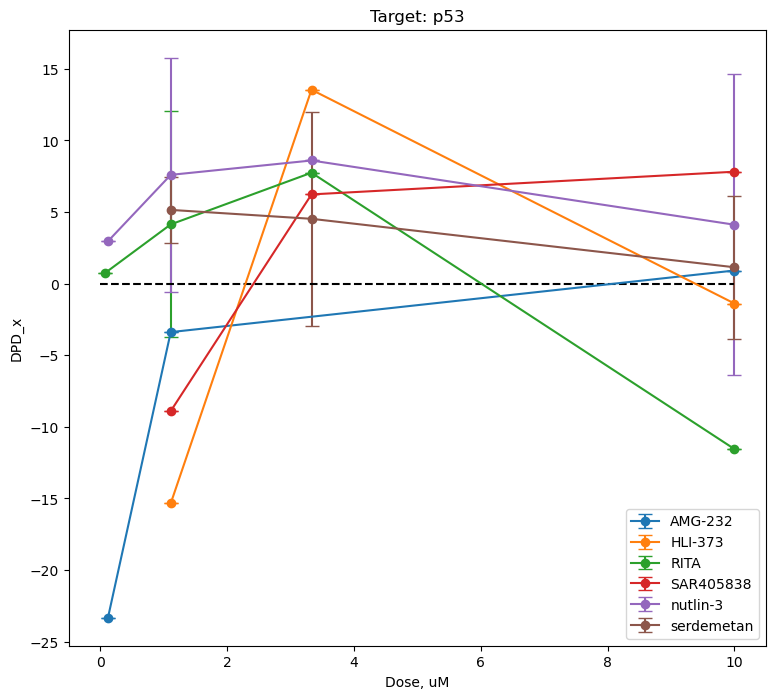

In [335]:
target_name = "p53"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

### Estrogen

In [336]:
target = "ESR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target ESR: 3 ['dienestrol', 'estradiol-cypionate', 'raloxifene']


In [337]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
dienestrol,ESR1,"0.12 uM, 1.11 uM, 10 uM"
estradiol-cypionate,ESR1,"0.12 uM, 1.11 uM, 10 uM"
raloxifene,"ESR1, ESR2","0.12 uM, 1.11 uM, 10 uM"


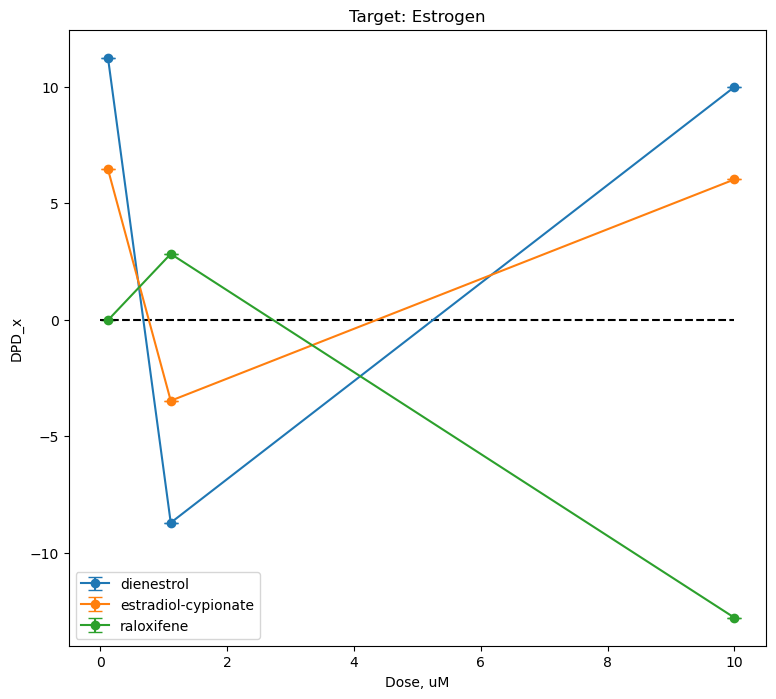

In [338]:
target_name = "Estrogen"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [339]:
target = "AR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target AR: 21 ['4-IBP', 'AG-14361', 'AM-580', 'API-001', 'BD-1063', 'GW-501516', 'L-693403', 'PRE-084', 'cutamesine', 'etofylline-clofibrate', 'flufenamic-acid', 'nandrolone', 'olaparib', 'oleoylethanolamide', 'oxandrolone', 'rimcazole', 'rucaparib', 'tamibarotene', 'testosterone-enanthate', 'testosterone-propionate', 'troglitazone']


In [340]:
drugs =['flufenamic-acid','nandrolone','testosterone-enanthate','testosterone-propionate']

In [341]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
flufenamic-acid,"AKR1C3, AR, PTGS1, PTGS2","1.11 uM, 10 uM, 3.33 uM"
nandrolone,"AR, CYP19A1, MAOA, MAOB, NISCH",10 uM
testosterone-enanthate,AR,"10 uM, 3.33 uM"
testosterone-propionate,AR,"1.11 uM, 10 uM, 3.33 uM"


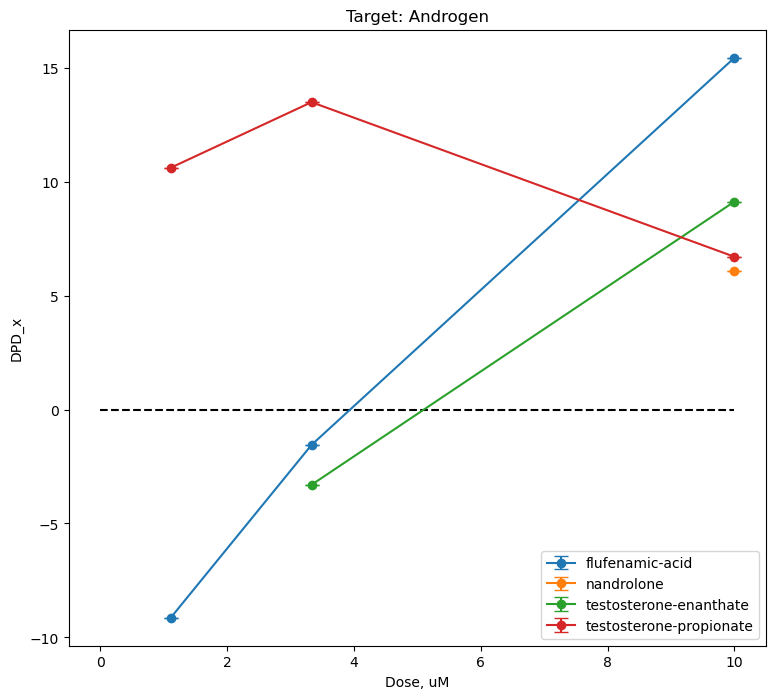

In [342]:
target_name = "Androgen"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [70]:
# delete module "PPARG"

In [71]:
print(print_drugs)

print_drugs_df = pd.DataFrame(print_drugs)
display(print_drugs_df)

print_drugs_df.to_excel("drugs.xlsx")

['CGP-60474', 'dinaciclib', 'PHA-767491', 'roscovitine', 'PF-03758309', 'PF-04691502', 'XL-147', 'GSK-2334470', 'A-66', 'BGT-226', 'BX-795', 'AZ-628', 'FR-180204', 'GDC-0879', 'GW-5074', 'PD-0325901', 'PD-184352', 'TAK-733', 'dabrafenib', 'refametinib', 'RAF-265', 'I-BET-762', 'I-BET-151', 'JQ-1-R', 'PFI-1', 'GSK-1070916', 'MLN-8054', 'ZM-447439', 'alisertib', 'SB-525334', 'rebastinib', 'lenvatinib', 'orantinib', 'foretinib', 'cediranib', 'sunitinib', 'tivozanib', 'enzastaurin', 'MG-132', 'bortezomib', 'ixazomib']


,0
0,CGP-60474
1,dinaciclib
2,PHA-767491
3,roscovitine
4,PF-03758309
5,PF-04691502
6,XL-147
7,GSK-2334470
8,A-66
9,BGT-226
